# **1- İş Problemi**



- Problem:
    - Diyelim ki bir postanede çalışıyoruz. Görevimiz, bize gelen çeşitli zarfların üzerinde el yazısıyla yazılmış harf ve rakamlardan oluşmuş adres ve posta kodu gibi bilgileri sisteme girmemiz isteniyor. Soru şu; bizim yapacak olduğumuz işlemi bir makine, algoritma yapsaydı insan gücünü daha verimli kullanabilir miydik?

    - Örneğin dijital bir 5 sayısı yazdığımızda 3.satır 2.sütunda bulunan 5 ile çok örtüşmüyor gibi. Ama biz 5 olduğunu anlayabiliyoruz. Peki öyleyse biz insan olarak nasıl ikisinin de 5 olduğunu anlayabiliyoruz? Cevap şu: bir örüntüye, bir referansa kıyasla ne olduğunu öğrenebiliyoruz.

    - Yapay sinir ağından da beklediğimiz ona verdiğimiz bir sürü şekilden aynı bizim 5'in farklı yazımlarını öğrenme şeklimiz gibi senin de öğrenmen için rakamların onlarca, yüzlerce farklı şekilde yazılmış halini yapay zekaya verip yapay zekanın bunları inceleyerek tıpki bizim öğrendiğimiz gibi öğrenmesi.

- Kullancağımız veri seti MNIST (Modified National Institue of Standarts and Technology)'den alınmış ünlü bir veri setidir.

- Her bir görüntü 28px x 28px boyutundadır.

- 60 bin train , 10 bin de test verisi bulunmaktadır.

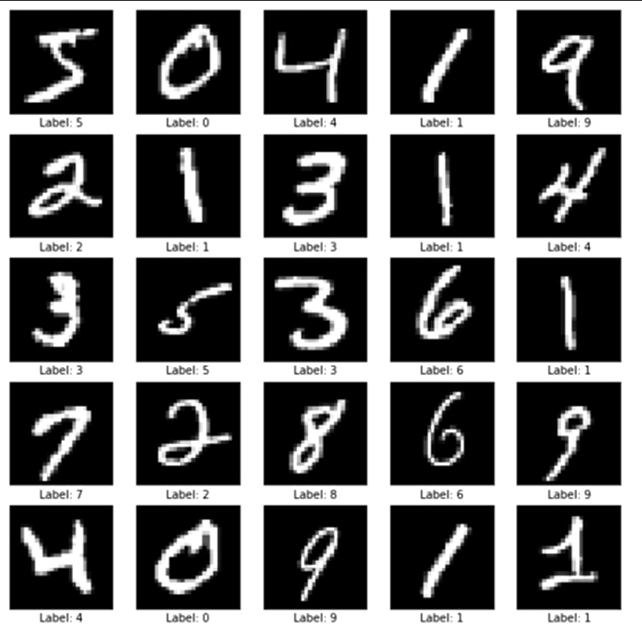

 # **2- Veriyi Anlamak-1**

In [2]:
pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist # veri setimizi import ettik
from tensorflow.keras.models import load_model , Sequential # model kurma ile ilgili
from tensorflow.keras.layers import Dense , Flatten # katmanlar ile ilgili
from tensorflow.keras.utils import to_categorical , plot_model  # ön işleme ile ilgili

import matplotlib.pyplot as plt
import numpy as np

# Gereksiz uyarı mesajlarını almamak için
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore' , category=DeprecationWarning)
warnings.filterwarnings('ignore' , category=FutureWarning)
warnings.filterwarnings('ignore' , category=UserWarning)
filterwarnings('ignore')



In [4]:
# Mnist veri setinin yüklenmesi

(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Eğitim setinin boyutu

print("Eğitim Seti Boyutu:" , x_train.shape , y_train.shape)

# 60.000 veri ve 28x28 piksel boyutunda

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [6]:
# Test setinin boyutu

print("Eğitim Seti Boyutu:" , x_test.shape , y_test.shape)

# 10.000 veri ve 28x28 piksel boyutunda

Eğitim Seti Boyutu: (10000, 28, 28) (10000,)


- **y -> 1-10 arasındaki sayıları (bağımlı değişken - label)**
- **x-> 28x28 px'den oluşan görsel (bağımsız değişken - features)**

In [7]:
# Bağımlı değişkenimizin kaç adet eşsiz değer aldığına bakalım (Label'ımızın sınıf sayısı)

num_labels = len(np.unique(y_train))
num_labels

10

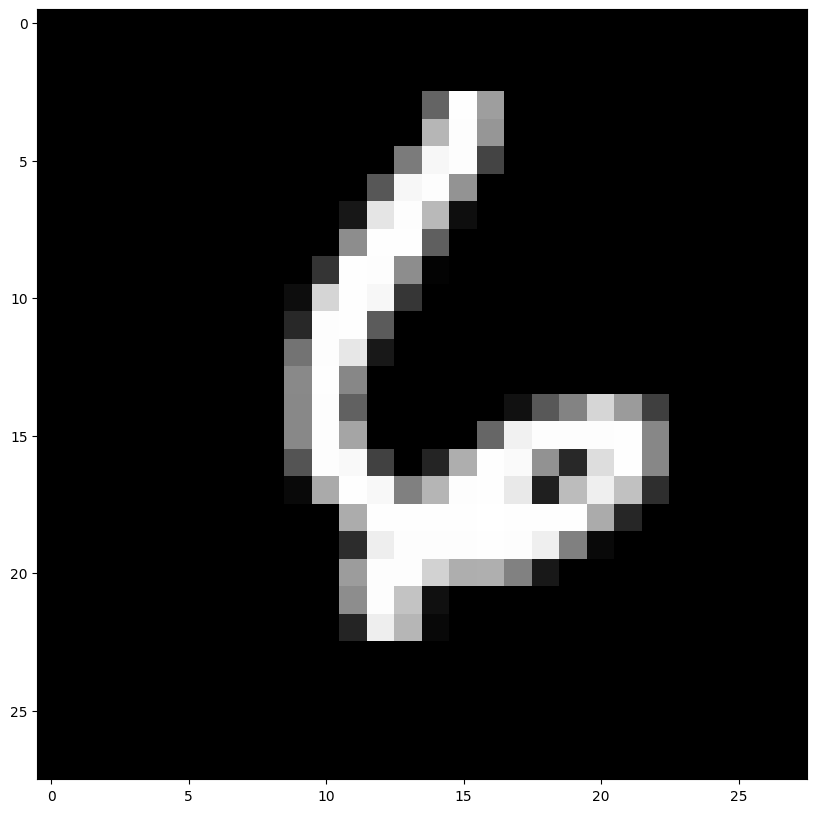

In [8]:
# Veri setinden örnek gösterilmesi

plt.figure(figsize=(10,10))
plt.imshow(x_train[59000] , cmap="gray")  # train setimizdeki 59.000'inci görsel
                                          # cmap -> gösterimin hangi tonda olacağını girdiğimiz attribute

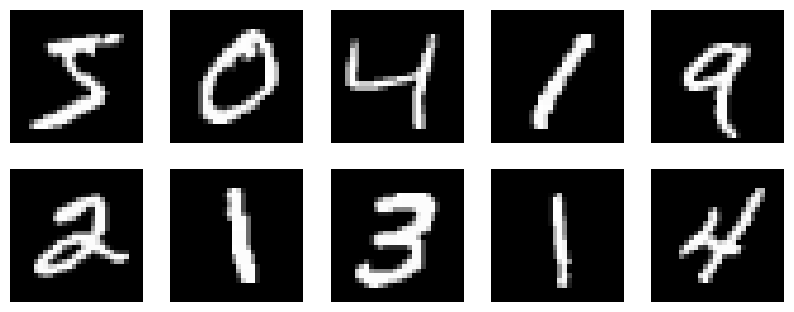

In [9]:
# Veri setinden birçok örnek gösterilmesi

plt.figure(figsize = (10,10))
for n in range(10):
  ax = plt.subplot(5 , 5 , n+1) # 5x5'lik bir ızgara görünümü verdik (5 satır 5 sütun)
  plt.imshow(x_train[n] , cmap="gray")
  plt.axis("off") # üstteki gibi eksen bilgisini görmek istemediğimiz için

# train setinin ilk 10 elemanı

In [10]:
# Üstteki işlemi tekrar tekrar yazmak yerine bir fonksiyon haline getirelim

def visualize_img(data , num):
  plt.figure(figsize=(10,10))
  for n in range(num):
    ax = plt.subplot(5 , 5 , n+1)
    plt.imshow(data[n] , cmap="gray")
    plt.axis("off")

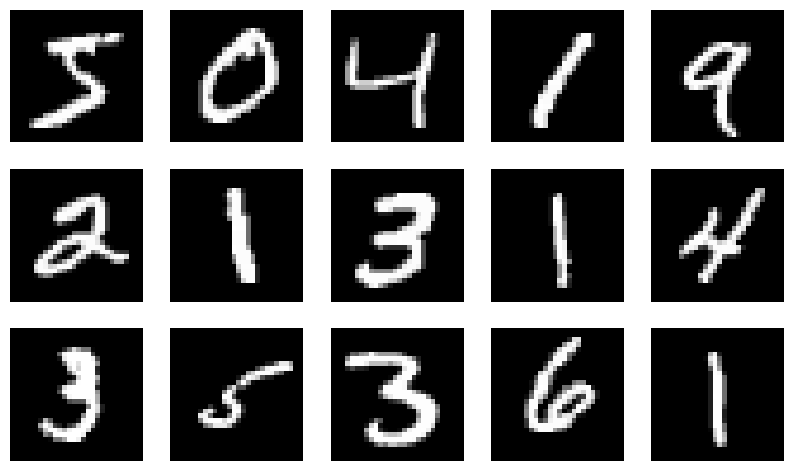

In [11]:
# Fonksiyonumuzu kullanalım

visualize_img(x_train , 15)

# <h2 style="color:red"> <b> 3- Veriyi Anlamak-2  !!!! </b> </h2>

- Bu bölümde bir resim sınıflandırma uygulaması yapacağız. Siyah-beyaz renklerden oluşan rakamları sinir ağına  "bak bu bu olduğunda bu rakam , şu olduğunda bu rakam" şeklinde gösterip "sen en iyisi bu örüntüleri öğren" diyeceğiz.

- Peki ama bu görselleri yapay sinir ağına numerik olarak nasıl gönderedceğiz problemi karşımıza çıkacak. Bir görselin bir makine öğrenmesi modeline gönderilmeden önce bunu matematiksel temsillere dönüştümesi lazım ki lineer cebir dünyasında hesaplamalı işlemler yapabilelim.

- Bizim veri setimizdeki göreseller 28x28'lik görseller. Yani bir rakamın yazımında toplam 784 adet piksel bulunuyor. Burada bir görseli düşündüğümüzde aklımıza şu gelmeli: "Biz ekrandan bir resme baktığımızda ekran buradaki renkleri bize nasıl yansıtıyor?". Bilgisayar bunu yapabilmek için **RGB (0-255) kodları** kullanıyor. R (kırmızı) , G (yeşil) , B (mavi) renkleri ile tüm renkleri elde eder.
  - ÖR=> r:250 g:10 b:240 = mor
  - ÖR=> r:250 g:0 b:250 =  daha koyu mor
  - ÖR=> r:255 g:255 b:255 =  beyaz
  - ÖR=> r:0 g:0 b:0 =  siyah

-

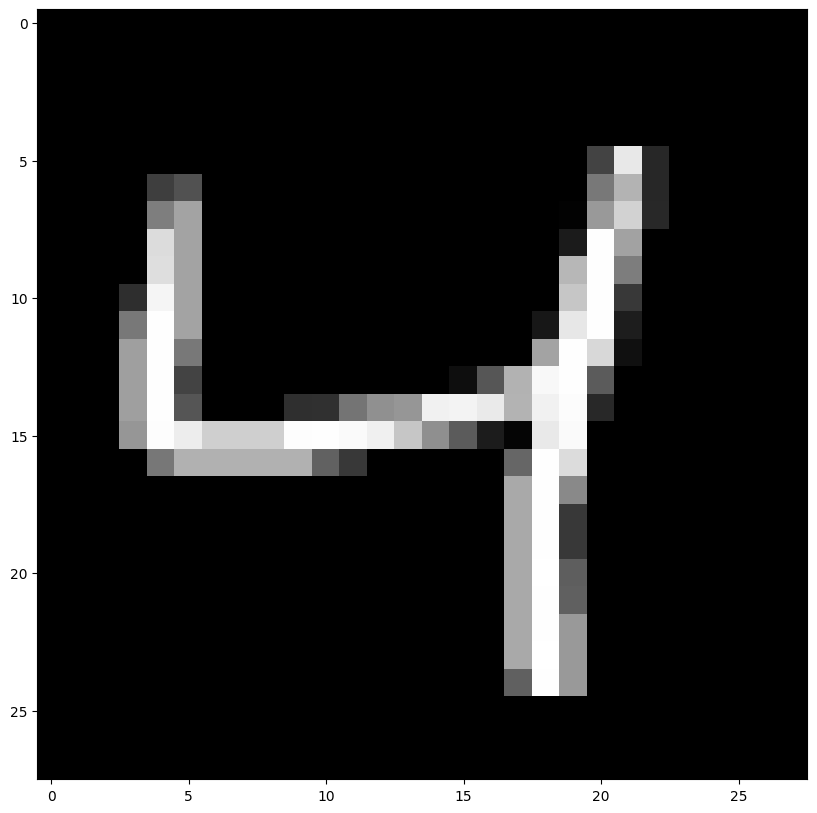

In [12]:
#

plt.figure(figsize=(10,10))
plt.imshow(x_train[2] , cmap="gray")


In [13]:
# Aslında göreselin matematiksel ifadesi şu şekilde her bir pikselin rgb kodlanmış halinde. Ancak bize çıktıyı verirken bu kodları renge dönüştürüp gösteriyor.

x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [14]:
# Örneğin 10. satır ile 10.sütünun kesişimindeki bir pikseli istediğimizi düşünelim

x_train[2][10,10]

# Görselde incelediğimzizde 10. satır 10 sütündaki pikselde siyah(0) renk olduğunu görüyoruz

0

In [15]:
# Örneğin 14. satır ile 10.sütünun kesişimindeki bir pikseli istediğimizi düşünelim

x_train[2][15,10]

# Görselde incelediğimzizde 10. satır 10 sütündaki pikselde beyaza çok yakın(254) renk olduğunu görüyoruz

254

In [16]:
# Bir görselin ortalamasını aldık

x_train[2].mean()

# Örneğin bu resmin numerik temsili 24 olabilir

24.799744897959183

In [17]:
# Bir görselin toplamını aldık (görseldeki piksellerin tüm değerlerini topladık)

x_train[2].sum()

# Örneğin bu resmin numerik temsili 19443 olabilir

# BURDA ELDE ETMEK İSTEDİĞİMİZ AMAÇ => BU GÖRSELLERE MATEMATİKSEL İŞLEMLERİN UYGULANABİLİR OLDUĞUNU GÖRMEK

19443

In [18]:
# Bir görselin x ekseninde 14-20 ; y ekseninde 10-20 aralığındaki pikselleri
# YANİ ASLINDA BELİRLİ BİR BÖLGEYE ZOOM YAPMIŞ OLDUK

x_train[2][14:20 , 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [19]:
# Zoom yaptığımız bölümün ortalamasına bakalım

x_train[2][14:20 , 10:20].mean()

96.51666666666667

In [20]:
# !!!!!!!! Her bir pikselin üzerine onun renk kodunu yazan fonskiyon

def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)    # Figüre 111 (1 satır, 1 sütun, 1. subplot) şeklinde bir eksen ekliyoruz
    ax.imshow(img, cmap="gray")     # Verilen görüntüyü gri tonlamalı (grayscale) olarak eksene çizdiriyoruz
    width, height = img.shape     # Görüntünün genişliği ve yüksekliği (piksel boyutları) alınıyor

    threshold = img.max() / 2.5    # Görüntüdeki en yüksek piksel değerinin 2.5'e bölünmesiyle bir eşik değeri belirleniyor


    # Görüntüdeki her bir piksel için döngü oluşturuluyor (x: satır, y: sütun)
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y, x), color="white" if img[x][y] < threshold else "black")   # Her pikselin üzerine değerini yazıyoruz. Değere göre beyaz ya da siyah renk seçiliyor...
                                                                                                                    # ... (siyahın üstüne beyaz , beyazın üstüne siyah yazmamız için)


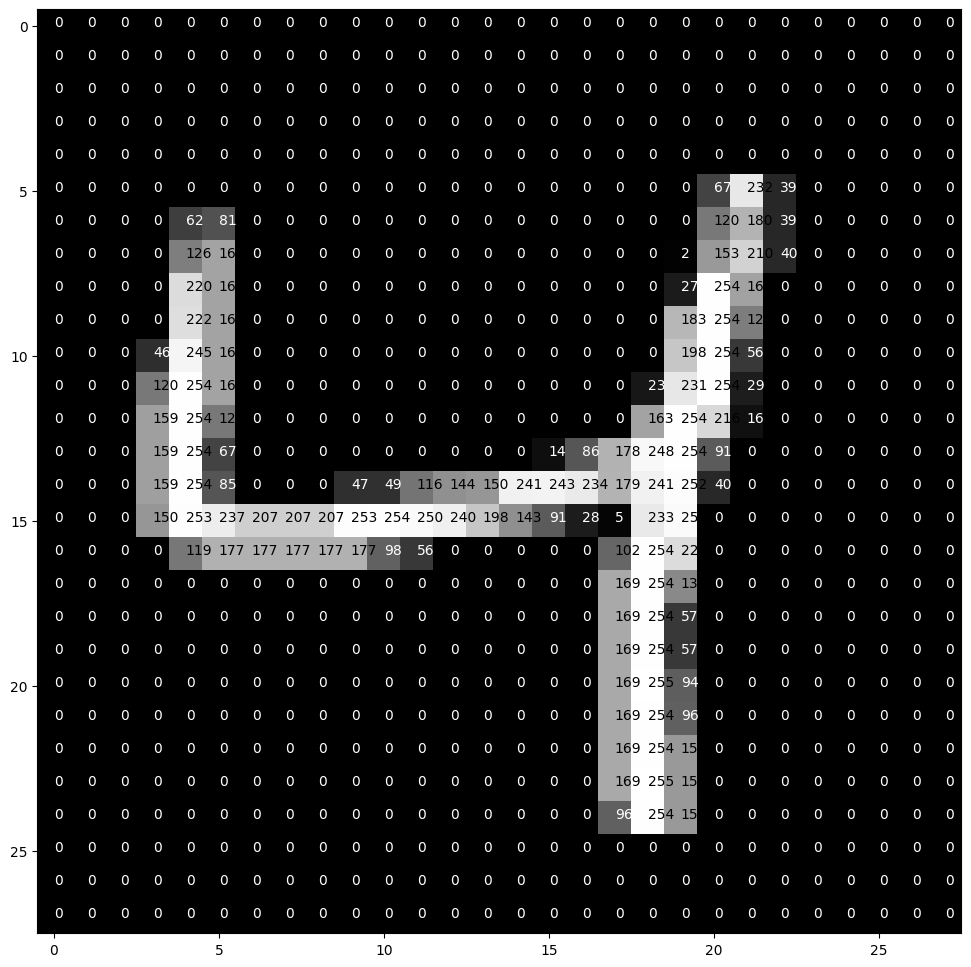

In [21]:
pixel_visualize(x_train[2])

# **4- Veriyi Hazırlama-1**

- **Encoding (Bağımlı Değişken İçin)**
  
  - Önce: [0 1 2 3 4 5 6 7 8 9]
  - Sonra: [0 0 1 0 0 0 0 0 0 ] -> Binary sistemde 2'yi temsil ediyor. (2'nin olduğu index 1 sadece)

In [22]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
# Bu sayede OneHotEncoding şekilde yazmış olacağız

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
# Kontrol edelim

np.set_printoptions(threshold=np.inf) # kısaltmayı kaldırmak için bu [0,0,...,0,0] şeklinde gözüküyordu. Bunu kaldırdım.

print(y_train[0:5])

# "array([5, 0, 4, 1, 9], dtype=uint8)" ilk değerlerimiz bu şekildeydi. Gördüğümüz gibi aşağıdaki çıktıda ilk satırda 5'in olduğu index , ikinci satırda 0'ın olduğu index sadece 1 değerini aldı.

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


- **Reshaping (Elimizdeki Veriyi Yapay Sinir Ağı Kendi Yapısal Formunda Algılaması İçin)**

In [25]:
image_size = x_train.shape[1]
image_size

28

In [26]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu:  {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu:  (10000, 28, 28)


In [27]:
# 3. bölümde oluşturduğumuz her bir pikselin içerisinde renk kodunu tutan boyutu da buraya eklememiz gerekiyor

x_train = x_train.reshape(x_train.shape[0] , 28 , 28 , 1) # 1 -> göreldeki piksellerin değerlerini(Bir tane 28x28'lik resmin 784 tane pikselini) temsil edecek
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu:  {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu:  (10000, 28, 28, 1)


- **Standardizasyon (Elimizdeki Her Bir Pikseldeki Veriyi Belirli Bir Standarda Dönüştürmek İçin)**

  - Yani örneğin görselimizdeki değerler 0-255 arasındaydı. Biz bunu 0-1 arasına getirerek standartlaştıracağız.

  - !!! Peki neden? Eğitim süresinin daha hızlı ve öğrenme sürecinin daha doğru, sonuca daha hızlı gidebilecek şekilde gerçekleşmesini sağlamaktır.

  - Bunu yapmamızın en kolay yolu da sayıları 255'e bölmek olacak.

In [28]:
# Her bir görselin içindeki 784 adet renk kodunu standartlaştırdık (Yani örneğin üstteki 4 resmi için her bir pikselin içinde yazan değeri 255'e böldük)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# **5- Modelleme !!!!!!**

- Sinir Ağı Mimarisini Tanımlamak -> kaç katmanlı olacak , kaç hücre olacak , çıkış katmanı ne olacak


In [31]:
# İlk olarak "binanın" dış cephesini yapacağız -> katman ekle , çıkış katmanı ekle,
# units = nöron sayısı
model = tf.keras.Sequential([     # Sequential yapay sinir ağı kurmamızı sağlayacak. (Sequantial(Sıralı) -> "sıralı katman"lardan oluşan yapay sinir ağı kurmamızı sağlar)
    Flatten(input_shape=(28,28,1)) ,   # Yaptığımız reshape işlemini sinir ağının anlayacağı bir "Flatten Katmanı"na dönüştürdük. Inputun şekillendiği ysa'nın kullanacağı formata dönüştürüldüğü 1. katman
    Dense(units=128 , activation="relu" , name="layer1") ,   # Bu "Dense Katmanı", bizim "hidden layer (gizli katman)"ımız.  128 birimden (nörondan) oluşuyor. Relu akt. fonks. kullanıyor. Burada 128 belirtemizin sebebi -> veri setinde rakamlar 128 adet özelliğe göre(sütun) sıralandığı için. Bu sayı 64 , 256... gibi de olabilirdi.
    Dense(units=num_labels , activation="softmax" , name="output_layer")])   # Bu "Dense Katmanı", bizim "output layer (çıktı katman)"ımız. "Softmax" kullanmamızın sebebi -> sınıflandırma projesi yaptığımız ve çıktımızda beklediğimiz 10 farklı sonuç (çok sınıflı) olduğundan. 2 Sınıflı olsaydı "sigmoid" kullanırdık.



# Daha sonra iç cephesini ayarlayacağız -> sinir ağının matematiksel tarafı. Loss fonks , optimizasyon fonks ne olacak , başarı metrikleri ne olacak
model.compile(
    loss="categorical_crossentropy" ,   # hata değerlendirme metriğimiz. Amacımız minimize etmektir. Çoklu sınıflandırma (2'den fazla çıktı sınıfı olduğunda) problemlerinde "categorical_crossentropy" kullandık.
    optimizer="adam" ,  # loss fonks. minimize edecek optimizasyon yöntemi. (Gradient discent de buraya girer)
    metrics=[tf.keras.metrics.Precision() , tf.keras.metrics.Recall() , "accuracy"])   # başarı metriklerimiz. Precision, Recall ve accuracy değerlerini kullandık.



# Şu an modeli kurmadık. Modelin yapısını tanımladık.

In [32]:
# Modelin özetini bir inceleyelim

model.summary()

# !!!!!!!!!!!!!!!!
# Tabloyu incelediğimizde gizli katmanımızda (layer1) 128 nörona karşılık hesaplanması gerek 100.480 veri olduğunu hesaplamış. Ama bunu neye göre hesapladı? ...
#... Girişimizde 784 tane piksel var. Bu 784 adet hücreden her biri 128 adet nöron ile bir etkileşim gelecek. Dolayısıyla 784*128 = 100.352 eder. 128 tane de bias değerimiz var 100.352 + 128 = 100.480

# Yine tabloyu incelediğimizde çıktı katmanımızda (output_layer) 10 nörona karşılık hesaplanması gerek 1290 veri olduğunu hesaplamış. Ama bunu neye göre hesapladı? ...
# Gizli katmanda 128 tane nöron var var. Bu 128 adet nöronun her biri 10 adet nöron ile bir etkileşim gelecek. Dolayısıyla 128*10 = 1280 eder. 10 tane de bias değerimiz var 1280 + 10 = 1290

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Modelin yapısını tanımlamıştık ilk hücrede. Şimdi son olarak modeli kurabiliriz
# epochs = iterasyon sayısı
# batch_size = optimizasyon işlemi sırasında gradyan hesaplarında veri setindeki bütün gözlem birimlerini her epoch'ta göz önünde bulundurulsun mu yoksa ...
  # ... buradan belirli sayıda rastgele alt küme seçelim ve bu alt küme üzerinden ağırlık güncellemeleri mi gerçekleşsin sorusunun yanıtı olarak ...
  # ... 128 girdiğimizde her iterasyonda 128 tane gözlem birimine odaklanarak ilgili optimizasyon yöntemine dayalı olarak gradyan hesaplanacak ve bir sonraki epoch'a geçilecek

model.fit(x_train , y_train , epochs=5 , batch_size=128 , validation_data=(x_test , y_test))

# accuracy -> train setinden elde ettiği değer iken val_accuracy -> test setinden elde ettiği değer



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8294 - loss: 0.6183 - precision: 0.9400 - recall: 0.7045 - val_accuracy: 0.9462 - val_loss: 0.1944 - val_precision: 0.9598 - val_recall: 0.9338
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9493 - loss: 0.1814 - precision: 0.9617 - recall: 0.9377 - val_accuracy: 0.9586 - val_loss: 0.1407 - val_precision: 0.9679 - val_recall: 0.9515
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9644 - loss: 0.1238 - precision: 0.9725 - recall: 0.9578 - val_accuracy: 0.9662 - val_loss: 0.1138 - val_precision: 0.9724 - val_recall: 0.9614
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9737 - loss: 0.0941 - precision: 0.9797 - recall: 0.9690 - val_accuracy: 0.9701 - val_loss: 0.0961 - val_precision: 0.9748 - val_recall: 0.9672
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9790 - loss: 0.0759 - precision: 0.9832 - recall: 0.9751 - val_accuracy: 0.9715 - val_loss: 0.0925 

In [35]:
# İterasyon arttıkça başarımızın arttığını gözlemliyoruz. O zman epochs değerimizi 10 olarak güncelleyerek deneyelim (Yani 10 defa geri besleme yaparak ağırlıkları güncelleyelim)

model.fit(x_train , y_train , epochs=10 , batch_size=128 , validation_data=(x_test , y_test))

# Daha da iyi bir sonuç elde ettik.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9819 - loss: 0.0649 - precision: 0.9857 - recall: 0.9783 - val_accuracy: 0.9731 - val_loss: 0.0875 - val_precision: 0.9759 - val_recall: 0.9706
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9857 - loss: 0.0510 - precision: 0.9878 - recall: 0.9829 - val_accuracy: 0.9778 - val_loss: 0.0775 - val_precision: 0.9808 - val_recall: 0.9749
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0423 - precision: 0.9903 - recall: 0.9864 - val_accuracy: 0.9734 - val_loss: 0.0853 - val_precision: 0.9771 - val_recall: 0.9709
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9905 - loss: 0.0359 - precision: 0.9923 - recall: 0.9887 - val_accuracy: 0.9772 - val_loss: 0.0756 - val_precision: 0.9797 - val_recall: 0.9751
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9921 - loss: 0.0309 - precision: 0.9933 - recall: 0.9906 - val_accuracy: 0.9772 - val_loss: 0.

# **6- Model Başarısını Değerlendirme**

In [36]:
# İlk olarak önceki modelin çıktısını bir değişkende saklayalım

history = model.fit(x_train , y_train , epochs=10 , batch_size=128 , validation_data=(x_test , y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9980 - loss: 0.0114 - precision: 0.9982 - recall: 0.9976 - val_accuracy: 0.9766 - val_loss: 0.0818 - val_precision: 0.9780 - val_recall: 0.9756
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9980 - loss: 0.0101 - precision: 0.9983 - recall: 0.9978 - val_accuracy: 0.9782 - val_loss: 0.0782 - val_precision: 0.9800 - val_recall: 0.9775
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9987 - loss: 0.0078 - precision: 0.9989 - recall: 0.9986 - val_accuracy: 0.9790 - val_loss: 0.0820 - val_precision: 0.9802 - val_recall: 0.9778
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9986 - loss: 0.0073 - precision: 0.9987 - recall: 0.9986 - val_accuracy: 0.9791 - val_loss: 0.0792 - val_precision: 0.9804 - val_recall: 0.9785
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9993 - loss: 0.0056 - precision: 0.9994 - recall: 0.9993 - val_accuracy: 0.9801 - val_loss: 0.

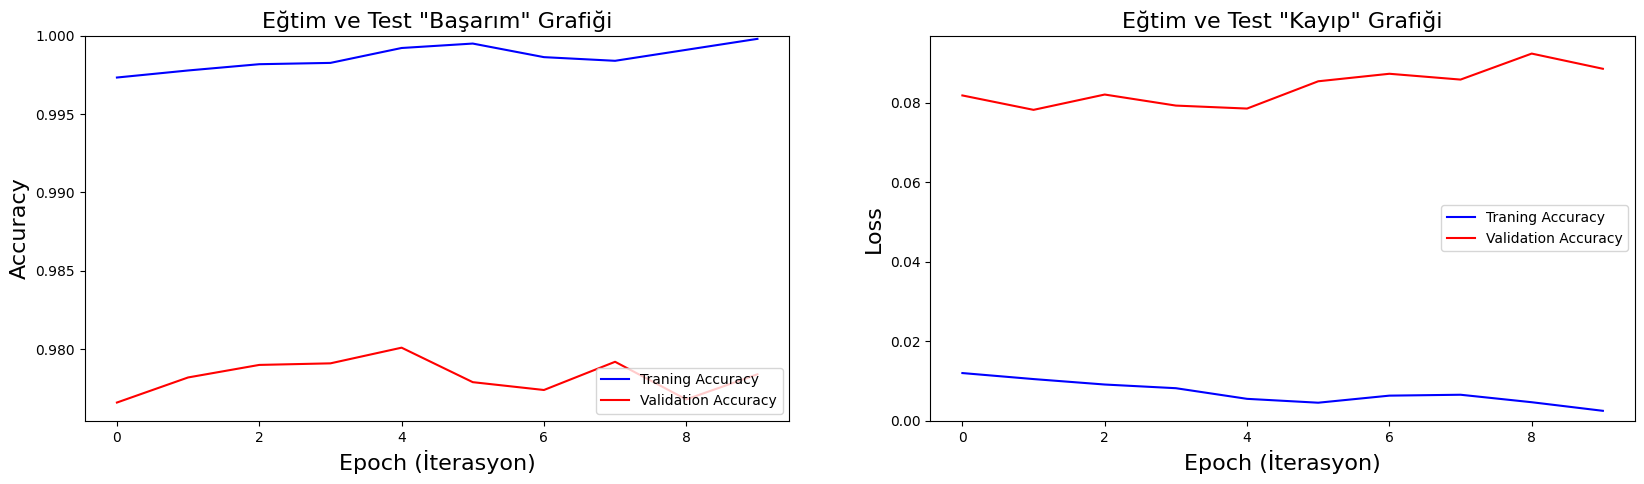

In [42]:
################################
# Accuracy ve Loss Grafikleri
################################

#------------------- Grafik1 / Accuracy --------------------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)  # birden  fazla grafik kullanacağımız için subplot kullandık "1'de 2'nin 1.si"
plt.plot(history.history['accuracy'] , color="b" , label="Traning Accuracy")
plt.plot(history.history['val_accuracy'] , color="r" , label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch (İterasyon)" , fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim(min(plt.ylim()) , 1)
plt.title('Eğtim ve Test "Başarım" Grafiği' , fontsize=16)





#------------------- Grafik2 / Loss --------------------------------
plt.subplot(1,2,2)   # "1'de 2'nin 2.si"
plt.plot(history.history['loss'] , color="b" , label="Traning Accuracy")
plt.plot(history.history['val_loss'] , color="r" , label="Validation Accuracy")
plt.legend(loc="center right")
plt.xlabel("Epoch (İterasyon)" , fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim(0 , max(plt.ylim()))
plt.title('Eğtim ve Test "Kayıp" Grafiği' , fontsize=16)

plt.show()

In [49]:
# Başarı metriklerimizi biraz daha düzenli bir şekilde görelim

loss , precision , recall , acc = model.evaluate(x_test , y_test , verbose=False)

print(f"Test Accuracy:  {100.0 * acc}")
print(f"Test Loss:      {100.0 * loss}")
print(f"Test Precision: {100.0 * precision}") # Örneğin 8 diye tahmin ettiğimiz sınıfın gerçekte ne kadar 8 olduğunu ifade eder. Yani tahminler sonucu gerçekle ne kadar örtüştüğümüzü ifade eder. "ÖNCE TAHMİN DEĞERİ SONRA GERÇEK DEĞER"
print(f"Test Recall:    {100.0 * recall}")  # Sınıfların kaç tanesini doğru tahmin ettiğimizi ifade eder. Yani önce gerçek olan değerler odaklanarak "biz bunların kaç tanesini doğru tahmin ettik?" diye bakar. ""ÖNCE GERÇEK DEĞERİ SONRA TAHMİN DEĞER""


# Accuracy , Precision , Recall değerlerimizin birbirine çok yakın olduğunu görüyoruz. Bu da veri setimizin "dağılımının" uygun olduğunu , sınıflar arası dengesizlik olmadığını gösteriyor.

Test Accuracy:  97.83999919891357
Test Loss:      8.849125355482101
Test Precision: 97.95693755149841
Test Recall:    97.81000018119812


# **7- Modelin Kaydedilmesi ve Tahmin İçin Kullanılması**

In [50]:
# Önce modeli kaydedelim

model.save("mnist_model.h5")

In [53]:
# x_test içerisinden rastgele bir örnek seçerek modeli test edelim

import random

random = random.randint(0 , x_test.shape[0])
random

9660

In [54]:
# Test setinde ilgili index'e giderek 9660. indexteki görseli inceleyelim

test_image = x_test[9660]

In [57]:
# y_test içerisinden bu random index'teki değere bakalım

y_test[random]

# Bu görselde 7 sayısının görseli varmış

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

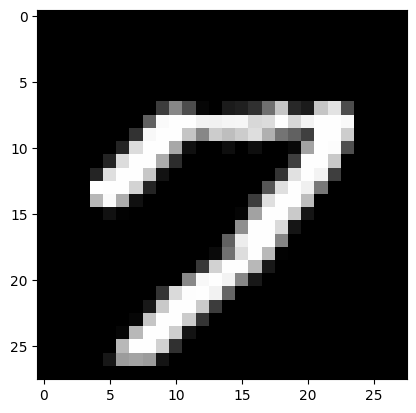

In [58]:
# Test görselimizi bir inceleyelim görsel olarak

plt.imshow(test_image.reshape(28,28) , cmap="gray")

In [59]:
# Şimdi bu görseli modele soralım. Tahmin ettiği rakamı ve bu rakamın olma olasılığını bize söylemesi gerekiyor

test_data = x_test[random].reshape(1,28,28,1)

probability = model.predict(test_data)
probability

# Bize olasılık değerlerini verdi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[6.6033921e-11, 1.2281222e-16, 6.9639619e-08, 1.4337569e-07,
        4.2913197e-07, 1.1037643e-12, 3.9575199e-17, 9.9999678e-01,
        3.1332750e-08, 2.5781853e-06]], dtype=float32)

In [62]:
# Biz bu olasılık değerlerinden en yüksek oranı istiyoruz

prediction_classes = np.argmax(probability)
prediction_classes

# Gördüğümüz gibi bu rakamı en yüksek ihtimalle 7 olarak  tahmin etmiş. Yani doğru sonuca ulaşmış

7

In [68]:
# Biraz daha görsel olarak güzel bir şekilde görmek istersek

print(f"Algoritmanın Tahmin Ettiği Sınıf: {prediction_classes}")
print(f"Tahmin Ettiği Sınıfın Doğru Olma Olasılığı: {(np.max(probability , axis=-1))[0]} \n")
print(f"Tüm Sınıfların Olasılık Değerleri: {probability}")


Algoritmanın Tahmin Ettiği Sınıf: 7
Tahmin Ettiği Sınıfın Doğru Olma Olasılığı: 0.9999967813491821 

Tüm Sınıfların Olasılık Değerleri: [[6.6033921e-11 1.2281222e-16 6.9639619e-08 1.4337569e-07 4.2913197e-07
  1.1037643e-12 3.9575199e-17 9.9999678e-01 3.1332750e-08 2.5781853e-06]]
